# The Holy Quran

### https://www.kaggle.com/zusmani/the-holy-quran

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from csv import QUOTE_NONE

### Load the data

In [3]:
def read_and_reformat(csv_path):
    df = pd.read_csv(csv_path,
                     sep='|', 
                     header=None,
                     names=['Surah', 'Ayah', 'Text'])    
    return df

In [4]:
arabic_quran = read_and_reformat('./DATA/Arabic-Original.csv')

In [5]:
arabic_quran.head()

,Surah,Ayah,Text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [6]:
arabic_quran.shape

(6236, 3)

### Urdu Version

In [7]:
urdu_quran = read_and_reformat('./DATA/Urdu.csv')
urdu_quran.head()

,Surah,Ayah,Text
0,1,1,شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...
1,1,2,سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...
2,1,3,بڑا مہربان نہایت رحم والا
3,1,4,انصاف کے دن کا حاکم
4,1,5,(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...


In [8]:
urdu_quran.shape

(6236, 3)

### Printing Last Surah

In [9]:
print(arabic_quran[arabic_quran['Surah']==114]['Text'])

6230    بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ قُلْ أَ...
6231                                      مَلِكِ النَّاسِ
6232                                     إِلَٰهِ النَّاسِ
6233                  مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِ
6234              الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ
6235                           مِنَ الْجِنَّةِ وَالنَّاسِ
Name: Text, dtype: object


### Count of verses of each surah

In [10]:
ayah_count = arabic_quran.groupby(['Surah']).size()

In [11]:
ayah_count

Surah
1        7
2      286
3      200
4      176
5      120
      ... 
110      3
111      5
112      4
113      5
114      6
Length: 114, dtype: int64

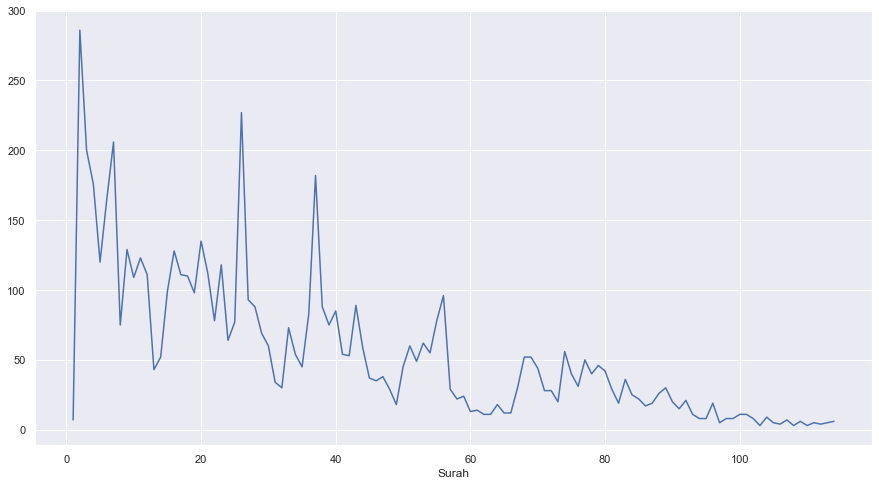

In [12]:
plt.figure(figsize=(15,8))
ayah_count.plot()

### English Version

In [13]:
eng_quran = pd.read_csv('./DATA/English.csv',
                     sep='|',
                     encoding='iso-8859-1',
                     header=None,
                     quoting=QUOTE_NONE,
                     names=['Surah', 'Ayah', 'Text'])    
eng_quran['Text'] = eng_quran['Text'].str.replace('#NAME\?', '')
eng_quran['Surah'] = eng_quran['Surah'].str.replace('"', '')
eng_quran['Text'] = eng_quran['Text'].str.strip(',')
eng_quran['Surah'] = eng_quran['Surah'].str.strip(',')
eng_quran['Surah'] =  pd.to_numeric(eng_quran['Surah'])

In [14]:
eng_quran.head()

,Surah,Ayah,Text
0,1,1.0,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2.0,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3.0,"Most Gracious, Most Merciful;"
3,1,4.0,Master of the Day of Judgment.
4,1,5.0,"Thee do we worship, and Thine aid we seek."


In [15]:
eng_quran.shape

(6228, 3)

In [16]:
eng_ayah_count = eng_quran.groupby(['Surah']).size()

In [17]:
eng_ayah_count

Surah
1        7
2      286
3      200
4      176
5      120
      ... 
110      3
111      5
112      4
113      5
114      6
Length: 114, dtype: int64

### Frequency of word 'Allah'

In [182]:
word_counter = eng_quran['Text'].str.count("Allah").sum()

In [183]:
print('The word ALLAH appears in the Holy Quran:',word_counter,'times')

The word ALLAH appears in the Holy Quran: 2974.0 times


### Frequency of word 'اللَّهِ'

In [169]:
word_counter:int = 0
for text in arabic_quran['Text']:
#     print(text)
    word_counter = word_counter +  text.count('للَّهِ')
    word_counter = word_counter +  text.count('لِلَّهِ')
    word_counter = word_counter +  text.count('للَّهُ')
    word_counter = word_counter +  text.count('للَّهَ')

In [170]:
word_counter

2817

### Frequency of word 'Heaven' & 'Hell'

In [184]:
word_counter = eng_quran['Text'].str.count("heaven").sum()
print('The word HEAVEN appears in the Holy Quran:',word_counter,'times')

The word HEAVEN appears in the Holy Quran: 237.0 times


In [189]:
word_counter = eng_quran['Text'].str.count("Hell").sum()
print('The word HELL appears in the Holy Quran:',word_counter,'times')

The word HELL appears in the Holy Quran: 91.0 times


### Frequency of word 'Man'

In [200]:
word_counter = eng_quran['Text'].str.count("man|Man|Men|men").sum()
print('The word MAN appears in the Holy Quran:',word_counter,'times')

The word MAN appears in the Holy Quran: 1620.0 times
